In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증 데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor

# 머신러닝 알고리즘 - 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 머신러닝 알고리즘 - 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝 알고리즘 
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 다중분류를 위한 원핫 인코더
from keras.utils import to_categorical

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 16                  # 폰트 크기
plt.rcParams['figure.figsize'] = 10,8          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 하기
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 랜덤 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
# 데이터 불러오기
column_list = ['꽃받침길이', '꽃받침너비','꽃잎길이','꽃잎너비','품종']
df1 = pd.read_csv('../dataset/iris.csv', names = column_list)
df1.head()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


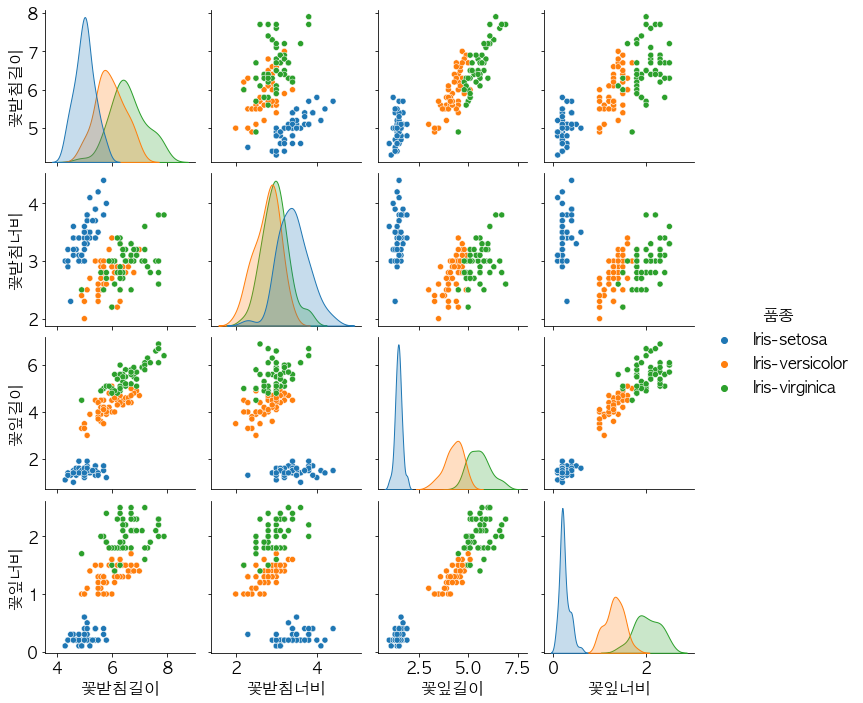

In [4]:
# pairplot
sns.pairplot(df1, hue='품종')
plt.show()

In [5]:
# 입력과 결과로 나누기
X = df1.drop('품종', axis =1)
Y = df1['품종']

In [6]:
# 문자열 인코딩
encoder1 = LabelEncoder()
encoder1.fit(Y)
Y1 = encoder1.transform(Y)
Y1[:5]

array([0, 0, 0, 0, 0])

In [7]:
# 원핫 인코딩
y_encoded = to_categorical(Y1)
y_encoded[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### 이진 분류
- 출력층의 노드 = 1
- 출력층의 활성 함수 = 'sigmoid'
- compile시 loss = 'binary_crossentropy

### 다중 분류
- 결과 데이터를 원핫 인코딩
- 출력층 노드 = 결과데이터의 종류수
- 출력층 활성 함수 = 'softmax'
- compile시 loss = 'categorical_crossentropy'

In [8]:
# 모델설정
model = Sequential()

# 은닉층
model.add(Dense(16, input_dim = 4, activation = 'relu'))

# 출력층 (출력값이 3개중 하나이기때문에 노드 수 3)
model.add(Dense(3,activation = 'softmax'))

In [9]:
# 모델 컴파일
# 다중 분류일 경우 loss = 'categorical_crossentropy'
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# 모델 실행
# 시작 시간
now = time.time()
model.fit(X,y_encoded,epochs=50, batch_size=10, verbose = 0)

# 경과시간
print(f'경과시간 : {time.time() - now}')

경과시간 : 0.6939709186553955


In [11]:
# 예측 정확도 출력
# 주어진 입력 데이터를 통해 예측 결과를 도출하고 설정한 결과 데이터와 비교해서 얼마나
# 일치하는지 확인
# X에는 학습하지 않은 데이터도 넣어 봐야함

print(f'정확도 : {model.evaluate(X, y_encoded)[1]}')

5/5 [==============================] - 0s 852us/step - loss: 0.3427 - accuracy: 0.9733
정확도 : 0.9733333587646484


In [12]:
# 2021년 이후 제거 예정
# pred = model.predict_classes(X)
# pred

pred = np.argmax(model.predict(X), axis=-1)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
# 결과값 디코딩
y_pred = encoder1.inverse_transform(pred)
y_pred[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [14]:
# 평가
score = accuracy_score(Y,y_pred)
score

0.9733333333333334